## MLP for binary classification, using an SVM-style loss function

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

# This line is used in Jupyter notebooks to display plots inline
%matplotlib inline 

In [ ]:
from engine.scalar_engine import Value
from engine.scalar_modules import Neuron, Layer, MLP

In [41]:
np.random.seed(1337)
random.seed(1337)

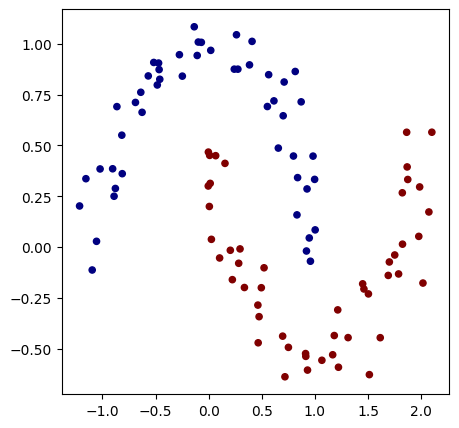

In [3]:
from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.1) # Generate a 2D dataset with two interleaving half circles

y = y * 2 - 1 # Make labels -1 and 1 instead of 0 and 1 for binary classification

# Visualize the dataset
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [ ]:
model = MLP(2, [16, 16, 1]) # 2-layer neural network
print(model)
print("number of parameters", len(model.parameters()))

MLP of [Layer of [ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2)], Layer of [ReLUNeuron(8), ReLUNeuron(8), ReLUNeuron(8), ReLUNeuron(8), ReLUNeuron(8), ReLUNeuron(8), ReLUNeuron(8), ReLUNeuron(8)], Layer of [LinearNeuron(8)]]
number of parameters 105


In [5]:
# Loss function to compute the SVM loss and accuracy

def loss(batch_size=None):
    
    # If batch_size is None, use the entire dataset; otherwise, sample a batch
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    
    # Convert numpy arrays to lists of Value objects
    inputs = [list(map(Value, xrow)) for xrow in Xb]
    
    # Forward pass through the model to get scores
    scores = list(map(model, inputs))
    
    ''' 
        SVM loss calculation :
        Loss is max(0, 1 - y * score) for each sample where y is the
        true label and score is the model's output 
    '''
    losses = [ (1 + -yi * scorei).relu() for yi, scorei in zip(yb, scores) ]
    data_loss = sum(losses) * (1.0 / len(losses))

    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    
    # Total loss is data loss plus regularization loss
    total_loss = data_loss + reg_loss
    
    # also get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]

    # Final accuracy = fraction of correct predictions
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss, acc)

Value(data=1.071019140599697, grad=0) 0.5


In [ ]:
# Optimization loop
for k in range(100):
    
    # Forward pass to compute loss and accuracy
    total_loss, acc = loss()
    
    # Backward pass to compute gradients
    model.zero_grad()
    total_loss.backward()
    
    # Update parameters using gradient descent
    # Learning rate decreases linearly from 1.0 to 0.1 over 100 steps
    learning_rate = 1.0 - 0.9*k/100
    for p in model.parameters():
        p.data -= learning_rate * p.grad
    
    print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")

step 0 loss 1.071019140599697, accuracy 50.0%
step 1 loss 0.6089908204190608, accuracy 78.0%
step 2 loss 2.085226281499175, accuracy 50.0%
step 3 loss 1.3722731998285982, accuracy 50.0%
step 4 loss 0.6169501666492759, accuracy 73.0%
step 5 loss 0.4408062787136647, accuracy 76.0%
step 6 loss 0.4180597340985334, accuracy 77.0%
step 7 loss 0.39729077033093246, accuracy 80.0%
step 8 loss 0.3764601527378985, accuracy 83.0%
step 9 loss 0.35305121082011764, accuracy 86.0%
step 10 loss 0.32469307292775396, accuracy 86.0%
step 11 loss 0.29829479281896143, accuracy 88.0%
step 12 loss 0.2731803182228548, accuracy 90.0%
step 13 loss 0.2554480927359867, accuracy 88.0%
step 14 loss 0.2613929101316826, accuracy 89.0%
step 15 loss 0.32571010972306885, accuracy 86.0%
step 16 loss 0.3215583265987031, accuracy 90.0%
step 17 loss 0.2813829128517599, accuracy 86.0%
step 18 loss 0.20645403455069156, accuracy 91.0%
step 19 loss 0.19382927187146737, accuracy 91.0%
step 20 loss 0.1976864801699804, accuracy 94.

(-1.548639298268643, 1.951360701731357)

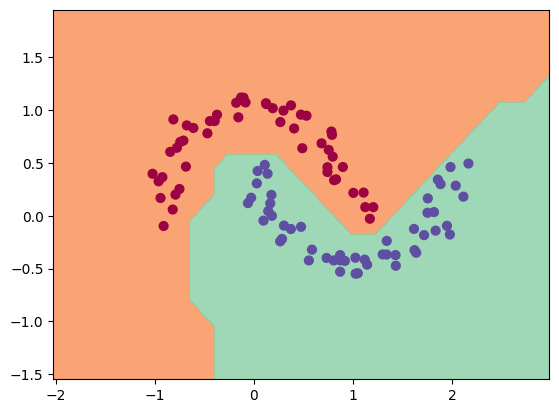

In [46]:
# Visualize the decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

MLP of [Layer of [ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2)], Layer of [ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16)], Layer of [LinearNeuron(16)]]
number of parameters 337
Step 0 | train loss 0.9292, acc 48.00% | val loss 0.7956, acc 56.00%
Step 1 | train loss 2.0811, acc 80.00% | val loss 1.6559, acc 84.00%
Step 2 | train loss 1.0835, acc 69.33% | val loss 0.9428, acc 76.00%
Step 3 | train loss 0.8359, acc 80.00% | val loss 0.7084, acc 84.00%
Step 4 | train loss 0.4753, acc 81.33% | val loss 0.4340, acc 84.00%
Step 5 | train loss 0.3694, acc 82.67% | val loss 0.3468, acc 88.00%
Step 6

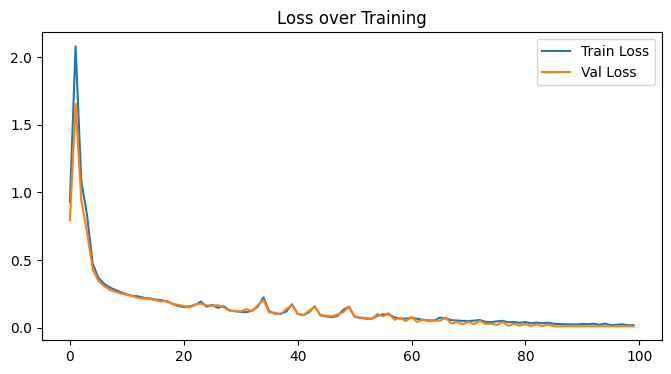

/var/folders/jg/5_k2pkcs46l5jw99tv9zf3jm0000gn/T/ipykernel_31573/3108313672.py:90: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_val[:, 0], X_val[:, 1], c=y_val, s=60, cmap=plt.cm.coolwarm, edgecolors='k', label='Val', marker='x')


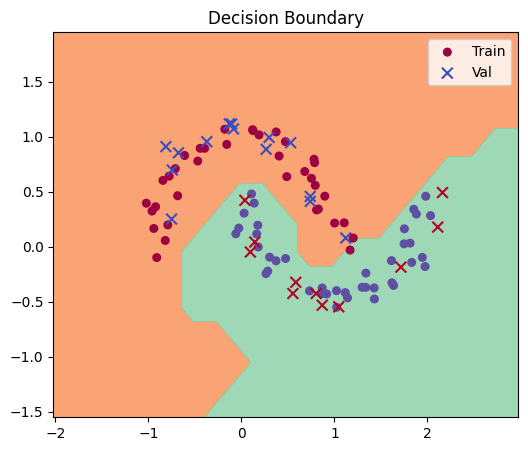

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from engine.scalar_engine import Value
from engine.scalar_modules import MLP

# Config
np.random.seed(1337)
random.seed(1337)
%matplotlib inline

# Generate 2D binary classification dataset
X, y = make_moons(n_samples=100, noise=0.1)
y = y * 2 - 1  # convert to -1/+1 labels

# Train/Validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

# Define model
model = MLP(2, [16, 16, 1])
print(model)
print("number of parameters", len(model.parameters()))

# Loss function with optional batch and dataset
def loss(X, y, batch_size=None):
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]

    inputs = [list(map(Value, xrow)) for xrow in Xb]
    scores = list(map(model, inputs))
    losses = [(1 + -yi * scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))

    alpha = 1e-4
    reg_loss = alpha * sum((p * p for p in model.parameters()))
    total_loss = data_loss + reg_loss
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]

    return total_loss, sum(accuracy) / len(accuracy)

# Training loop
train_losses, val_losses = [], []
train_accs, val_accs = [], []

for k in range(100):
    total_loss, acc = loss(X_train, y_train)
    val_loss, val_acc = loss(X_val, y_val)

    model.zero_grad()
    total_loss.backward()

    learning_rate = 1.0 - 0.9 * k / 100
    for p in model.parameters():
        p.data -= learning_rate * p.grad

    train_losses.append(total_loss.data)
    val_losses.append(val_loss.data)
    train_accs.append(acc)
    val_accs.append(val_acc)

    print(f"Step {k} | train loss {total_loss.data:.4f}, acc {acc*100:.2f}% | val loss {val_loss.data:.4f}, acc {val_acc*100:.2f}%")

# Plot training and validation loss
plt.figure(figsize=(8, 4))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.title("Loss over Training")
plt.legend()
plt.show()

# Plot decision boundary
h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores]).reshape(xx.shape)

plt.figure(figsize=(6, 5))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Spectral, label='Train')
plt.scatter(X_val[:, 0], X_val[:, 1], c=y_val, s=60, cmap=plt.cm.coolwarm, edgecolors='k', label='Val', marker='x')
plt.title("Decision Boundary")
plt.legend()
plt.show()
